## 📊 Descriptive Analytics — Predictive Maintenance

In industrial settings, unexpected equipment failures can lead to costly downtime and safety risks. Predictive Maintenance (PdM) uses sensor data and analytics to anticipate failures before they occur, enabling proactive interventions.

**Objective:**  
Summarize and explore a synthetic dataset containing sensor readings and failure labels to understand *what happened* in the system. This descriptive analysis provides a foundation for deeper diagnostic and predictive modeling.

**Data Description**

- **Sensor Signals:**  

  - `age`: The age of the asset (in hours or cycles), which can be related to wear and expected lifetime.
  - `load_factor`: The operational load on the equipment, indicating how hard the asset is working.
  - `ambient`: Ambient environmental temperature around the asset, which can affect equipment performance.
  - `temperature`: Operating temperature of the equipment, measured in degrees (likely Celsius). Abnormal values may indicate overheating or cooling issues.
  - `vibration`: Vibration level of the machine, which can reveal imbalance, misalignment, or wear in mechanical parts.
  - `pressure`: System pressure, which helps monitor for leaks, blockages, or abnormal operating conditions.
  - `current`: Electrical current drawn by the equipment, useful for detecting electrical faults or increased load.

- **Targets:**  
  - `fail_next_24h`: Binary indicator (1 = failure within next 24 hours, 0 = no failure)  
  - `rul_hours`: Remaining Useful Life (in hours) until failure

#### 📦 Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=(7,4)
pd.set_option('display.max_columns',50)

#### 📥 Read Data

In [ ]:
df = pd.read_csv('data/PdM_data.csv')

df.head()

,asset_id,age,load_factor,ambient,temperature,vibration,pressure,current,fail_next_24h,rul_hours
0,0,175.027531,1.037522,28.639848,75.772244,0.777042,32.456836,15.351275,1,112.743486
1,0,176.027531,0.792100,24.400995,74.248343,0.786263,33.293140,12.791664,0,114.756578
2,0,177.027531,0.641573,28.776035,70.731868,0.752131,30.066905,10.782674,1,127.546885
3,0,178.027531,0.638114,25.154667,68.649198,0.672473,34.409435,10.587894,1,149.582275
4,0,179.027531,0.632052,36.919182,69.473329,0.667970,32.937247,12.690585,0,130.314500


#### 📈 Descriptive Summaries

In [3]:
display(df.describe().T)
print('Failure rate (within 24h):', df['fail_next_24h'].mean().round(3))

,count,mean,std,min,25%,50%,75%,max
asset_id,19200.0,199.500000,115.472700,0.000000,99.750000,199.500000,299.250000,399.000000
age,19200.0,2451.458257,1439.476063,104.808540,1204.700849,2313.424393,3694.425689,5029.735877
load_factor,19200.0,0.698910,0.147795,0.200000,0.600098,0.698096,0.799102,1.200000
ambient,19200.0,29.963199,5.967801,7.773472,25.978649,29.956489,34.035997,50.946039
temperature,19200.0,72.924306,3.470594,59.424712,70.575469,72.931707,75.286900,86.440081
vibration,19200.0,1.047592,0.230182,0.422106,0.859767,1.033008,1.237209,1.651906
pressure,19200.0,31.492532,1.687306,24.638080,30.366341,31.472760,32.637021,37.948154
current,19200.0,14.158528,1.578954,8.642874,13.013573,14.133119,15.283762,19.680358
fail_next_24h,19200.0,0.822708,0.381925,0.000000,1.000000,1.000000,1.000000,1.000000
rul_hours,19200.0,100.350108,18.941366,48.691285,86.545693,97.729069,112.201205,181.874749


Failure rate (within 24h): 0.823


#### 📊 Visualize Histogramsgrams

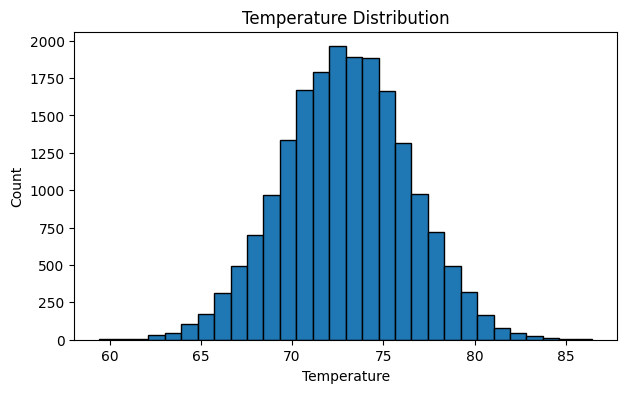

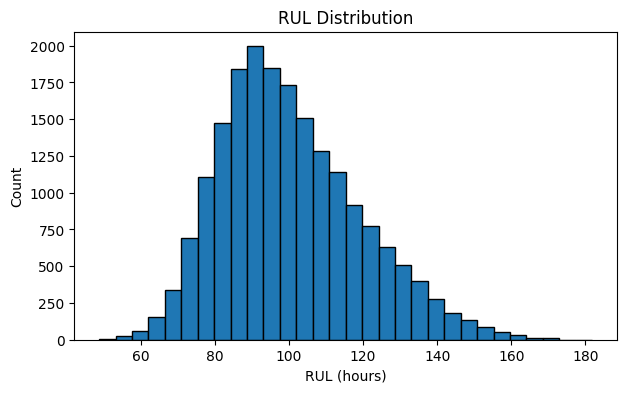

In [4]:
plt.hist(df['temperature'],bins=30,edgecolor='black'); plt.title('Temperature Distribution'); plt.xlabel('Temperature'); plt.ylabel('Count'); plt.show()
plt.hist(df['rul_hours'],bins=30,edgecolor='black'); plt.title('RUL Distribution'); plt.xlabel('RUL (hours)'); plt.ylabel('Count'); plt.show()

#### 🔎 Simple Slices (Quartiles)

In [5]:
df['vib_q']=pd.qcut(df['vibration'],4,labels=['Q1','Q2','Q3','Q4'])
display(df.groupby('vib_q', observed=False)['fail_next_24h'].mean().rename('failure_rate'))
df.drop(columns=['vib_q'],inplace=True)

vib_q
Q1    0.625000
Q2    0.810625
Q3    0.907292
Q4    0.947917
Name: failure_rate, dtype: float64

#### 🗃️ Box plots to visualize quartiles for each

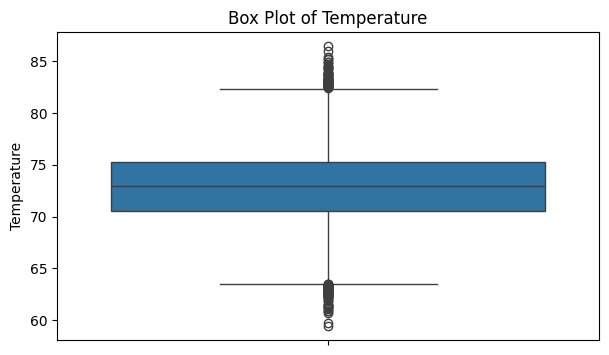

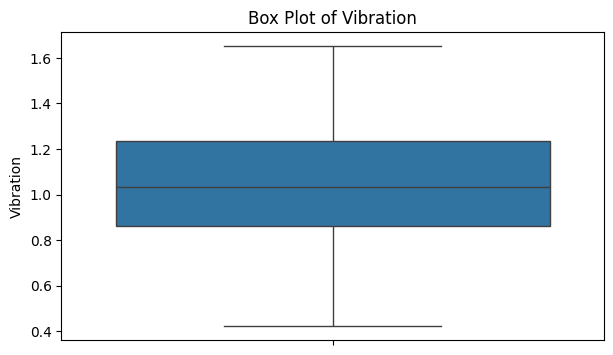

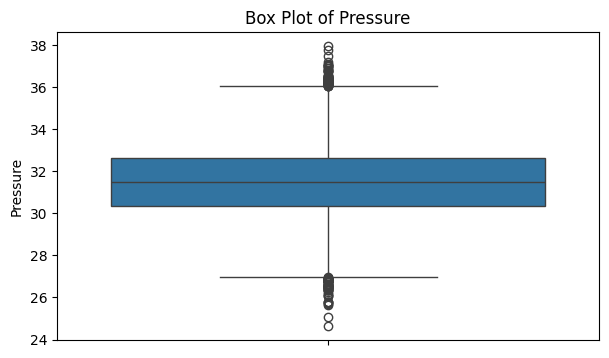

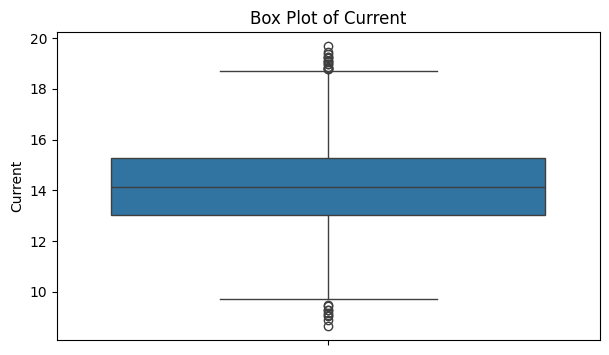

In [6]:
sensor_cols = ['temperature', 'vibration', 'pressure', 'current']
for col in sensor_cols:
    if col in df.columns:
        plt.figure()
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot of {col.capitalize()}')
        plt.ylabel(col.capitalize())
        plt.show()

#### 🎻 Violin plots to visualize distribution for each sensor

A **violin plot** combines aspects of a box plot and a kernel density plot. It shows the distribution, probability density, and quartiles of the data for each sensor. The width of the "violin" at different values indicates how common those values are in the dataset, helping to reveal multimodal distributions, skewness,

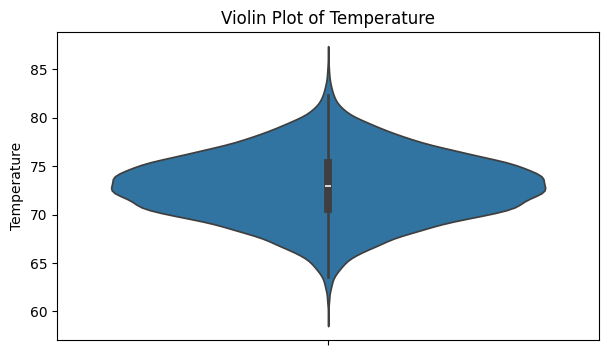

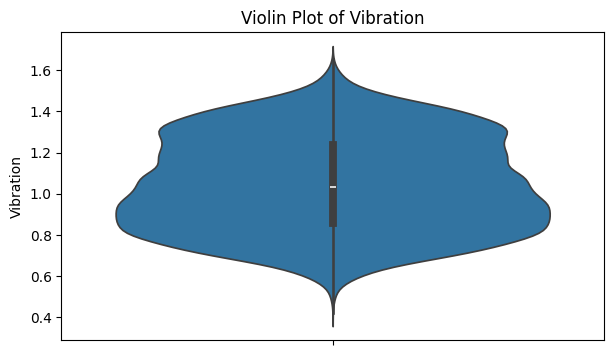

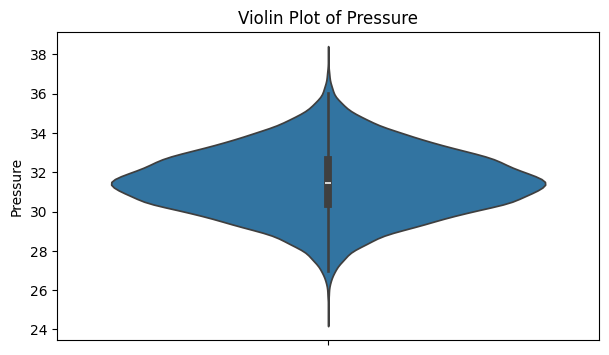

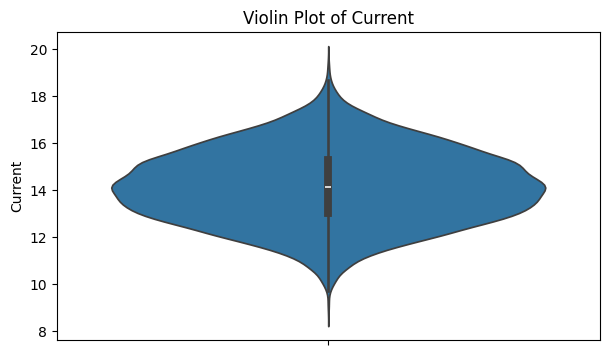

In [7]:
for col in sensor_cols:
    if col in df.columns:
        plt.figure()
        sns.violinplot(y=df[col])
        plt.title(f'Violin Plot of {col.capitalize()}')
        plt.ylabel(col.capitalize())
        plt.show()